<a href="https://colab.research.google.com/github/stefanlessmann/ASE-ML/blob/main/Day-2-Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wecome to our Section 11 Deep Learning Practice Session
Today, we further develop our understanding of neural networks. 

The outline of today's session is as follows:
- Demonstrate how neural networks output predictions.Formally, this is called computing the  *forward* path of a neural network. 
- Showcase neural network training using the *Tensorflow Playground*
- Train a neural network for regression using the `sklearn` library

But before we start, let us import some standard Python libraries.

In [77]:
# Standard libraries for data data handling and plotting
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## Computing the forward path of a simple neural network
In this demo, we start by create some synthetic data points

In [93]:
# Forward path computations:

# 1. Generate some synthetic data in two dimensions:
n = 100  # no. of data points
m = 2  # no. of features
X = np.random.standard_normal(size=(n,m))  # standard normally distributed data in m dimensions
print("Shape of the data: ", X.shape)

Shape of the data:  (100, 2)


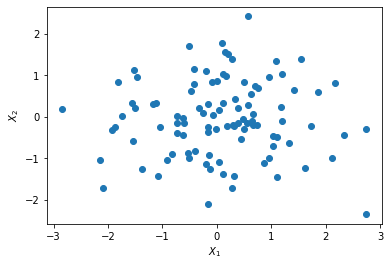

In [79]:
# In case you want to eyeball the data
plt.scatter(X[:,0], X[:,1])  
plt.ylabel("$X_2$")
plt.xlabel("$X_1$")
plt.show()

In [94]:
# 2. Architecture of the neural network
n_in = m  # no. of input nodes
n_out = 1  # no. of output nodes
n_hidden = 5  # we assume we have only one hidden layer with this many hidden nodes

A network with the above configuration has two weight matrices connecting the input to the hidden and the hidden to the output layer, respectively. Let's define the dimensionality of the corresponding weight matrices. 


In [95]:
dim_w1 = (n_hidden, n_in)
dim_w2 = (n_out, n_hidden)

Next, we initialize our weight matrices with some random numbers. 

In [96]:
# Weights between input and hidden layer
W1 = np.random.uniform(low=0.0, high=1.0, size=dim_w1)
print("W1 shape: ", W1.shape)
# Weigths between hidden and output layer
W2 = np.random.uniform(low=0.0, high=1.0, size=dim_w2)
print("W2 shape: ", W2.shape)

W1 shape:  (5, 2)
W2 shape:  (1, 5)


In [97]:
# We are now ready to compute the forward path.
# For simplicity, we illustrate the calculations for a single data point 
x = X[0,:]

# Step from input to hidden layer
z = np.dot(W1, np.transpose(x))  # compute the input to the hidden layer, denoted by z in the slides
print("Hidden layer input: ", z)  # note how we obtained one input activation for each hidden node

# Next, we compute the output of the hidden layer. This requires an activation functions.
# Let's assume we use sigmoid activation
def my_sigmoid(z):
  return 1 / (1 + np.exp(-z))

h = my_sigmoid(z)
print("Hidden layer output: ", h)

# Step from hidden to output layer
yhat = np.dot(W2, np.transpose(h))
print("Network output: ", yhat)

Hidden layer input:  [-0.13740695 -0.24200514 -0.28941551 -0.67852867 -0.17722056]
Hidden layer output:  [0.46570221 0.43979227 0.42814697 0.33658977 0.45581045]
Network output:  [0.60925931]


The above demo makes two significant simplifications. First, we omitted the fact that every hidden node and the output node in a neural network has a bias. The lecture slides show this clear. Yet, our calculations ignored the bias. 

Second, we only illustrated the calculation for a single data point. In theory, we could input every data point of our data set individually to our neural network. However, a much more efficient way would to generalizing the above calculations such that they compute the network output for the entire data set at once. The lecture slides illustrate how to do this.

If you are interested, extending the above example by addressing these two simplications would be an excellent exercise to deepen your understanding of neural networks.

## Tensorflow Playground
The previous example has shown how to compute the output of a neural network, in other words a prediction. However, the prediction was entirely random. To produce good predictions, we need to train our neural network in very much the same way as we *train* a simple regression model. Recall that in the case of ordinary regression, *training* corresponds to setting the regression coefficients such that we minimize the sum of squared residuals. 

Before looking at the maths of neural network training, it is illustrative to explore the  [Tensorflow Playground](https://playground.tensorflow.org/). Let's leave this Python notebook for a while and check it out. 

## Train a neural network for regression using the sklearn library
Having enjoyed a visual demo of neural network training, it is time to see how we can build, train, and use neural networks in Python. 

To that end, we will reuse the `make_regression()` function from yesterday to create us some synthetic data, and then fit a neural network to this data using functionalities of the `sklearn` library.

Specifically, we address the following tasks:
- Create synthetic data for regression. Your data set should comprise some informative and one uninformative features.
- Fit a neural network to this data.
- Optional: Configure the network to have two hidden layers of, respectively, 5 and 3 hidden nodes
- Create some additional synthetic data using the same logic as before, and compute predictions using the trained neural network. 
- Compute and print the root mean-square error (RMSE)
- Optional: Also compute the RMSE for the training data and compare the two RMSE values for the training and test data. 

In [98]:
# 1. Create synthetic data
from sklearn.datasets import make_regression

useful_features = 5
noise_features = 1

X, y = make_regression(n_samples=1000, 
                       n_features=useful_features+noise_features,
                       n_informative=useful_features)

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (1000, 6)
Shape of y:  (1000,)


In [99]:
# 2. Fit a neural network
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor()  # This sufficies for the basic solution
## nn = MLPRegressor(hidden_layer_sizes=(5,3))  # This is the solution when also addressing the optional task

nn.fit(X, y)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [100]:
# 3. Create additional synthetic data for testing our network 
X_test, y_test = make_regression(n_samples=1000, 
                       n_features=useful_features+noise_features,
                       n_informative=useful_features)

# 4. Compute neural network predictions
yhat = nn.predict(X_test)

# 5. Compute RMSE
def my_rmse(actual, forecast):
  ''' Helper function to compute RMSE given actuals (y) and predictions (yhat) '''
  n = len(actual)
  return np.sqrt(
              1/n * np.sum(
                      np.power(actual - forecast,2)
              ))
rmse_test = my_rmse(y_test, yhat) 
print(rmse_test)


119.56349259370948


In [101]:
# 6. Optional: RMSE on the training data
rmse_train = my_rmse(y, nn.predict(X))
print(rmse_train)

14.230590934155684
